# Simple Linear Regression on Churn Out Rate

**Emp_data** -> Build a prediction model for *Churn_out_rate*.

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### Load Dataset

In [2]:
emp = pd.read_csv('emp_data.csv')

#### EDA on dataset

In [3]:
# Check first 5 records
emp.head(5)

,Salary_hike,Churn_out_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72


In [4]:
# Check last 5 records
emp.tail(5)

,Salary_hike,Churn_out_rate
5,1690,70
6,1706,68
7,1730,65
8,1800,62
9,1870,60


In [5]:
# Check for data types, non-null values & memory usage
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Salary_hike     10 non-null     int64
 1   Churn_out_rate  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [6]:
# Get central tendency, dispersion and shape of dataset’s distribution
emp.describe()

,Salary_hike,Churn_out_rate
count,10.000000,10.000000
mean,1688.600000,72.900000
std,92.096809,10.257247
min,1580.000000,60.000000
25%,1617.500000,65.750000
50%,1675.000000,71.000000
75%,1724.000000,78.750000
max,1870.000000,92.000000


In [7]:
# Checking Null values
emp.isnull().sum() * 100 / emp.shape[0]

Salary_hike       0.0
Churn_out_rate    0.0
dtype: float64

<font size = 3 color = darkblue>There are no NULL values in the dataset, hence it is clean.</font>

In [8]:
# Check for Skewness of all dataset columns
from scipy import stats
print("Skewness of Salary_hike is", stats.skew(emp['Salary_hike']))
print("Skewness of Churn_out_rate is", stats.skew(emp['Churn_out_rate']))

Skewness of Salary_hike is 0.7238457511861585
Skewness of Churn_out_rate is 0.5457985397147691


<font size = 3 color = darkblue>As skewness for *Churn_out_rate* is between -0.5 and 0.5, the distribution is approximately symmetric and as skewness for *Salary_hike* is between 0.5 amd 1, the distribution is moderately skewed. </font>

In [9]:
# Check for the column labels of the DataFrame
emp.columns

Index(['Salary_hike', 'Churn_out_rate'], dtype='object')

In [10]:
# Check the dimensions of the DataFrame
emp.shape

(10, 2)

In [11]:
# Check for the random sample from the DataFrame
emp.sample(5)

,Salary_hike,Churn_out_rate
4,1660,72
7,1730,65
6,1706,68
3,1640,75
1,1600,85


#### Visualize data

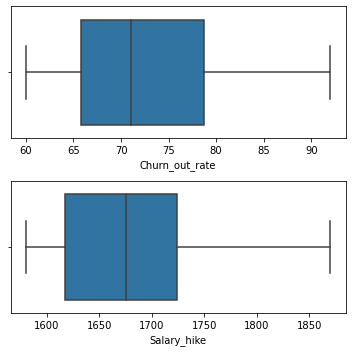

In [12]:
# Check for Outliers in dataset
fig, axs = plt.subplots(2, figsize = (5, 5))
plt1 = sns.boxplot(emp['Churn_out_rate'], ax = axs[0])
plt2 = sns.boxplot(emp['Salary_hike'], ax = axs[1])
plt.tight_layout()

<font size = 3 color = darkblue>There are no outliers present in the data.</font>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022B01F02AC8>,
      dtype=object)

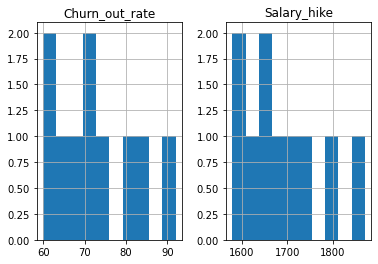

In [13]:
# Check for data normalization using histogram
emp.hist(column = ["Churn_out_rate", "Salary_hike"])

#### Correlation Analysis

In [14]:
emp.corr(method = 'pearson')

,Salary_hike,Churn_out_rate
Salary_hike,1.000000,-0.911722
Churn_out_rate,-0.911722,1.000000


The correlation between Salary_hike and weight gained is low (-91.2%)

In [15]:
# Assign data to variables
x = emp['Salary_hike']
y = emp['Churn_out_rate']

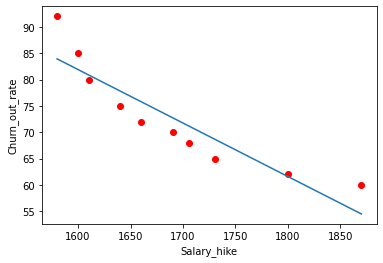

In [16]:
# Create Scatter plot
plt.scatter(x, y, color = 'red')

# m = slope, b = intercept
m, b = np.polyfit(x, y, 1)

# Add line of best fit
plt.plot(x, m*x + b)
plt.xlabel('Salary_hike')
plt.ylabel('Churn_out_rate')
plt.show()

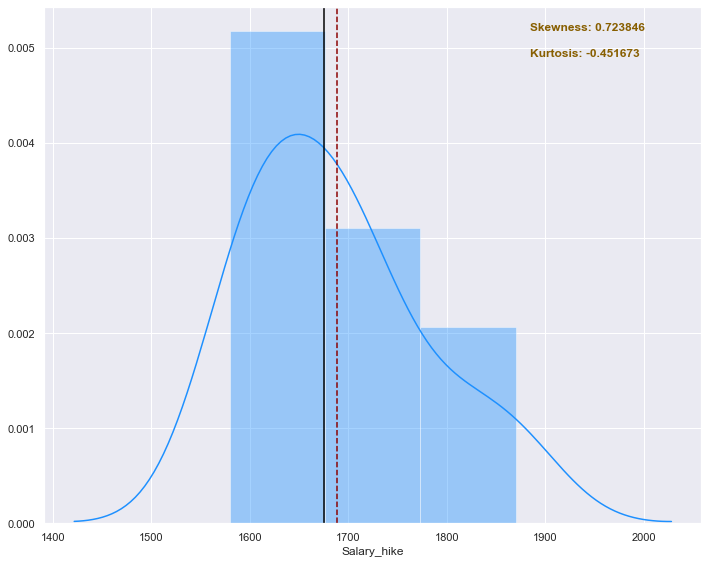

In [17]:
sns.set(color_codes = True)

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

sns.distplot(x, color = "dodgerblue")
plt.axvline(np.mean(x), color = 'darkred', linestyle = '--')
plt.axvline(np.median(x), color = 'black', linestyle = '-')

plt.text(0.74, 0.97, s = "Skewness: %f" % stats.skew(x),\
        transform=ax.transAxes, fontweight = 'demibold', fontsize = 12, horizontalalignment = 'left',\
        verticalalignment = 'top', color = 'xkcd:poo brown')
plt.text(0.74, 0.92, s = "Kurtosis: %f" % stats.kurtosis(x),\
        transform=ax.transAxes, fontweight = 'demibold', fontsize = 12, horizontalalignment = 'left',\
        verticalalignment = 'top', color = 'xkcd:poo brown')

plt.tight_layout()

plt.show()

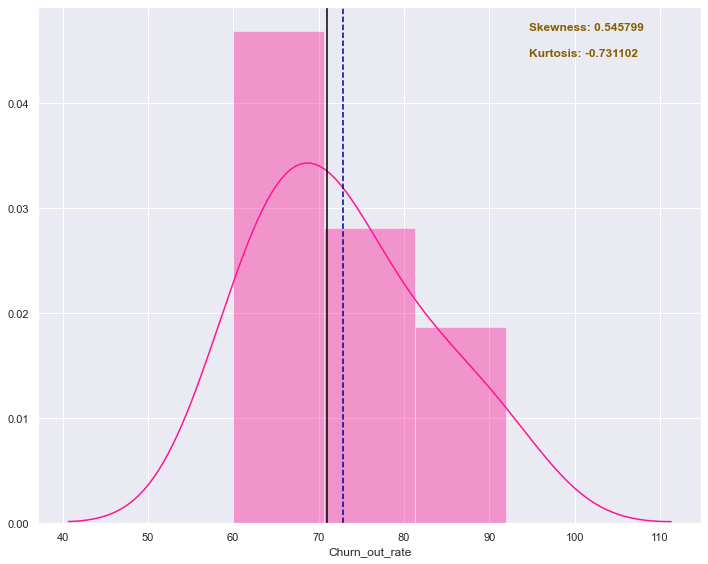

In [18]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

sns.distplot(y, color = "deeppink");
plt.axvline(np.mean(y), color = 'darkblue', linestyle = '--')
plt.axvline(np.median(y), color = 'black', linestyle = '-')

plt.text(0.74, 0.97, s = "Skewness: %f" % stats.skew(y),\
        transform=ax.transAxes, fontweight = 'demibold', fontsize = 12, horizontalalignment = 'left',\
        verticalalignment = 'top', color = 'xkcd:poo brown')   #, backgroundcolor = 'white'
plt.text(0.74, 0.92, s = "Kurtosis: %f" % stats.kurtosis(y),\
        transform=ax.transAxes, fontweight = 'demibold', fontsize = 12, horizontalalignment = 'left',\
        verticalalignment = 'top', color = 'xkcd:poo brown')

plt.tight_layout()
plt.show()

<font size = 3 color = darkblue>From the above plots, we can say that *Churn_out_rate* and *Salary_hike* data is **fairly** distributed. There is no *outlier* in both the columns as there is no data point outside the *minimum and maximum value*.</font>

#### Build Simple Linear Regression Model

In [19]:
# Converting X to numpy.array
x = np.array(x).reshape(-1, 1)

In [20]:
#split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [21]:
# Create linear regression object
regr = LinearRegression()
regr

LinearRegression()

In [22]:
# Fitting model
regr.fit(X_train, y_train)

LinearRegression()

In [23]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
y_pred

array([69.71984436, 72.07315175])

In [24]:
# The coefficients
print('Coefficients: ', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients:  [-0.09805447]
Mean squared error: 19.43
Coefficient of determination: -7.64


In [25]:
predict = regr.predict(x)

In [26]:
predict

array([84.42801556, 82.46692607, 81.48638132, 78.54474708, 76.58365759,
       73.64202335, 72.07315175, 69.71984436, 62.85603113, 55.9922179 ])

In [27]:
score = r2_score(y_test, y_pred)
score

-7.637221322217048

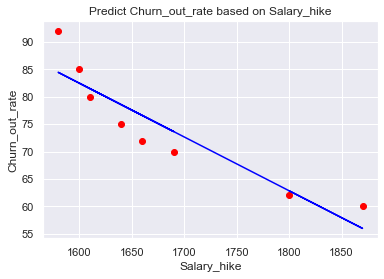

In [28]:
#visualize the training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regr.predict(X_train), color = "blue")
plt.title("Predict Churn_out_rate based on Salary_hike")
plt.xlabel("Salary_hike")
plt.ylabel("Churn_out_rate")
plt.show()

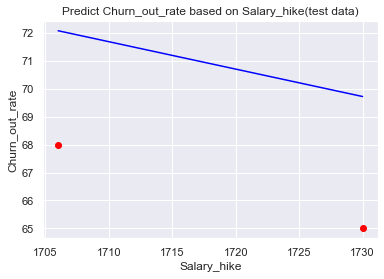

In [29]:
#visualize test results
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, regr.predict(X_test), color = "blue")
plt.title("Predict Churn_out_rate based on Salary_hike(test data)")
plt.xlabel("Salary_hike")
plt.ylabel("Churn_out_rate")
plt.show()